<a href="https://colab.research.google.com/github/GreatLearningAIML1/gurgaon-feb-batch-abhishek02git/blob/master/Face_detection_Questions_%26_Answers_Project_CV_AIML_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
#### Add your code here ####
os.chdir('/content/drive/My Drive/Advanced_CV/FaceDetect_Project')

In [0]:
pwd

'/content/drive/My Drive/Advanced_CV/FaceDetect_Project'

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
#### Add your code here ####

data = np.load('images.npy',allow_pickle=True)

In [0]:
data.shape

(409, 2)

In [0]:
data[4]

array([array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [190, 201, 107],
        [193, 204, 110],
        [193, 204, 108]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [191, 203, 105],
        [192, 204, 106],
        [193, 205, 105]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [187, 200,  94],
        [184, 197,  91],
        [185, 198,  90]],

       ...,

       [[191, 191, 203],
        [170, 170, 182],
        [167, 167, 177],
        ...,
        [ 24,  41,  71],
        [ 14,  33,  66],
        [  7,  27,  64]],

       [[190, 190, 202],
        [172, 172, 184],
        [170, 170, 182],
        ...,
        [ 33,  50,  80],
        [ 17,  36,  69],
        [  5,  25,  62]],

       [[189, 191, 204],
        [172, 174, 187],
        [169, 171, 183],
        ...,
        [ 44,  63,  95],
        [ 28,  48,  83],
        [ 14,  36

### Check one sample from the loaded "images.npy" file  (2 marks)

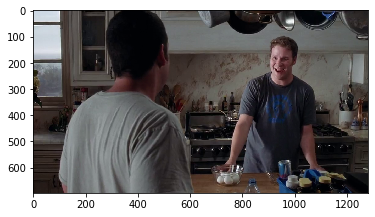

In [0]:
#### Add your code here ####
import matplotlib.pyplot as plt
plt.imshow(data[1,0])


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH =224 #### Add your code here ####
IMAGE_HEIGHT =224  #### Add your code here ####

# Initializing with the Masks size
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), HEIGHT_CELLS, WIDTH_CELLS))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    
    try:
      img = img[:, :, :3] 
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [0]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [0]:
#### Add your code here ####
masks.shape

(409, 28, 28)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


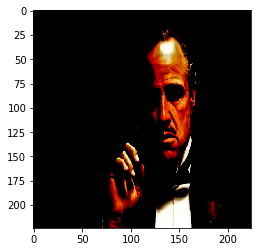

In [0]:
from matplotlib import pyplot
n = 10
# print(X_train[n])
pyplot.imshow(X_train[n].squeeze())

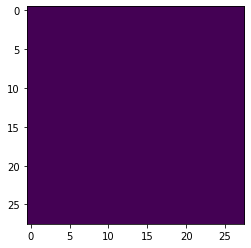

In [0]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
import keras
import tensorflow as tf



Using TensorFlow backend.


In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape,MaxPooling2D,Dropout,Conv2DTranspose,BatchNormalization
from tensorflow.keras.models import Model

    # Add all the UNET layers here
    #### Add your code here ####

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_HEIGHT, 3), include_top=False, alpha=1.0,weights = 'imagenet')#### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable
    
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((28, 28))(x)

    return Model(inputs=model.input, outputs=x)

    


    #### Add your code here ####

In [0]:
# # BELOW Code with UNET Laters defined which will work for 512,512 image.

# def create_model(trainable=True):
#     # model = VGG16(weights = "imagenet", include_top=False, input_shape = (512, 512, 3))
#     model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0,weights = 'imagenet')#### Add your code here ####
#     for layer in model.layers:
#         layer.trainable = trainable
#     x  = model.output
#     c1 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block1')(x)
#     c1 = BatchNormalization()(c1)
#     c1 = Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same',name = 'custom_conv2D_block1.1') (c1)
#     c1 = BatchNormalization()(c1)
#     p1 = MaxPooling2D((2,2))(c1)
#     p1 = Dropout(0.1)(p1)
    

#     c2 = Conv2D(32,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block2')(p1)
#     # c2 = Dropout(0.2)(c2)
#     c2 = BatchNormalization()(c2)
#     c2 = Conv2D(32,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block2.1')(c2)
#     c2 = BatchNormalization()(c2)
#     p2 = MaxPooling2D((2,2))(c2)
#     p2 = BatchNormalization()(p2)
#     p2 = Dropout(0.2)(p2)
    
#     c3 = Conv2D(64,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block3')(p2)
#     # c3 = Dropout(0.2)(c3)
#     c3 = BatchNormalization()(c3)
#     c3 = Conv2D(64,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block3.1')(c3)
#     c3 = BatchNormalization()(c3)
#     p3 = MaxPooling2D((2,2))(c3)
#     p3 = Dropout(0.3)(p3)

    
#     c4 = Conv2D(128,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block4')(p3)
#     # c4 = Dropout(0.3)(c4)
#     c4 = BatchNormalization()(c4)
#     c4 = Conv2D(128,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block4.1')(c4)
#     c4 = BatchNormalization()(c4)
#     p4 = MaxPooling2D((2,2))(c4)
#     p4 = Dropout(0.2) (p4)
    
#     c5 = Conv2D(256,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block5')(p4)
#     # c5 = Dropout(0.3)(c5)
#     c5 = Conv2D(256,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same', name = 'custom_conv2D_block5.1')(c5)
    

#     u6 = Conv2DTranspose(128,(3,3),strides = (2,2),padding = 'same',name = 'custom_Transpose_block1')(c5)
#     u6 = tf.keras.layers.concatenate([u6,c4])
#     u6 = Dropout(0.2)(u6)
#     c6 = Conv2D(128,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(u6)
#     # c6 = Dropout(0.2)(c6)
#     c6 = Conv2D(128,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(c6)

#     u7 = Conv2DTranspose(64,(3,3),strides = (2,2),padding = 'same', name = 'custom_Transpose_block2')(c6)
#     u7 = tf.keras.layers.concatenate([u7,c3])
#     u7 = Dropout(0.2)(u7)
#     c7 = Conv2D(64,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(u7)
#     # c7 = Dropout(0.2)(c7)
#     c7 = Conv2D(64,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(c7)

#     u8 = Conv2DTranspose(32,(3,3),strides = (2,2),padding = 'same', name = 'custom_Transpose_block3')(c7)
#     u8 = tf.keras.layers.concatenate([u8,c2])
#     u8 = Dropout(0.2)(u8)
#     c8 = Conv2D(32,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(u8)
#     # c8 = Dropout(0.2)(c8)
#     c8 = Conv2D(32,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(c8)
    
#     u9 = Conv2DTranspose(16,(3,3),strides = (2,2),padding = 'same', name = 'custom_Transpose_block4')(c8)
#     u9 = tf.keras.layers.concatenate([u9,c1])
#     u9 = Dropout(0.2)(u9)
#     c9 = Conv2D(16,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(u9)
#     # c9 = Dropout(0.2)(c9)
#     c9 = Conv2D(16,(3,3),activation= 'relu',kernel_initializer='he_normal',padding='same')(c9)

#     outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
#     model = Model(inputs=model.input, outputs=[outputs])
#     return model





### Call the create_model function

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=True)

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
# optimizer = Adam(lr = 1e-4, beta_1 =0.9,epsilon = None, decay = 0.0)
model.compile(optimizer='Adam', loss = loss , metrics = [dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                              mode="max", period=1)
stop = EarlyStopping(monitor="loss", patience=10, mode="max")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
#### Add your code here ####
model.fit(X_train,masks, batch_size=32,epochs=20,callbacks=[checkpoint,reduce_lr,stop])

Train on 409 samples
Epoch 1/20
384/409 [===========================>..] - ETA: 0s - loss: 0.1515 - dice_coefficient: 0.8779
Epoch 00001: loss did not improve from 4.87264
409/409 [==============================] - 4s 10ms/sample - loss: 0.1637 - dice_coefficient: 0.8651
Epoch 2/20
384/409 [===========================>..] - ETA: 0s - loss: 1.4926 - dice_coefficient: 0.8008
Epoch 00002: loss did not improve from 4.87264
409/409 [==============================] - 4s 10ms/sample - loss: 1.4076 - dice_coefficient: 0.8110
Epoch 3/20
384/409 [===========================>..] - ETA: 0s - loss: 0.1438 - dice_coefficient: 0.8856
Epoch 00003: loss did not improve from 4.87264
409/409 [==============================] - 4s 10ms/sample - loss: 0.1433 - dice_coefficient: 0.8869
Epoch 4/20
384/409 [===========================>..] - ETA: 0s - loss: 0.1097 - dice_coefficient: 0.9116
Epoch 00004: loss did not improve from 4.87264
409/409 [==============================] - 4s 10ms/sample - loss: 0.1434 - 

In [0]:
preds_train = model.predict(X_train, verbose=1)


409/409 [==============================] - 1s 2ms/sample


### Get the predicted mask for a sample image   (3 marks)

In [0]:
n = 10
sample_image = X_train[n]


def plot_sample(X, y, preds, ix=None):
    if ix is None:
        ix = np.random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='hot')
    if has_mask:
        ax[0].contour(y[ix].squeeze())
    ax[0].set_title('image')

    ax[1].imshow(preds[ix].squeeze())
    if has_mask:
        ax[1].contour(preds[ix].squeeze(), colors='k', levels=[0.5])
    ax[1].set_title('mask Predicted')
    

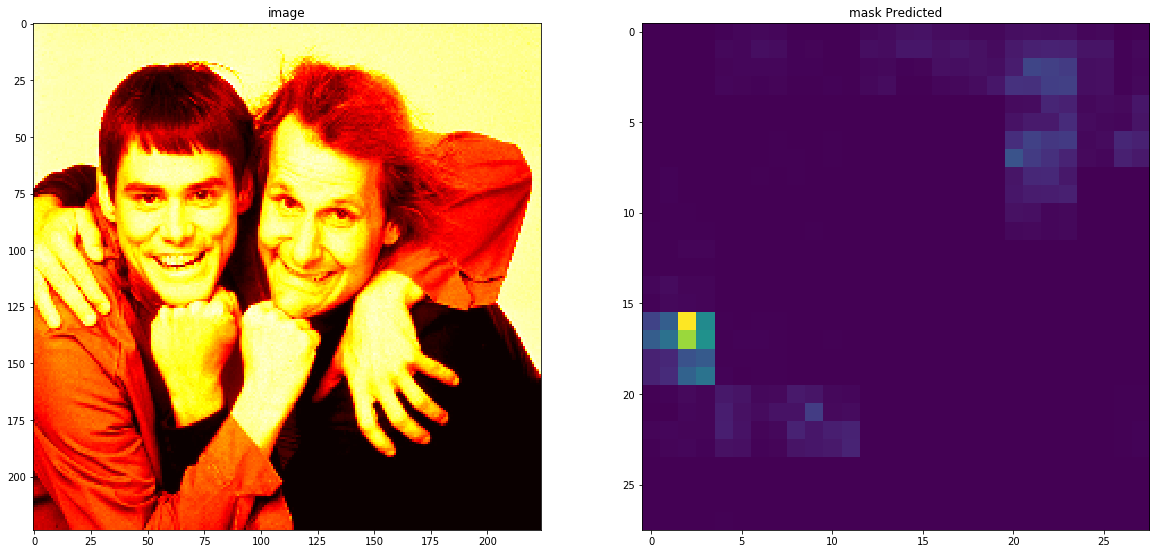

In [0]:
plot_sample(X_train,masks,preds_train)

### Impose the mask on the image (3 marks)

In [0]:
#### Add your code here ####


In [0]:
n = 10
sample_image = X_train[n]


def plot_sample(X, y, ix=None):
    if ix is None:
        ix = np.random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='hot')
    if has_mask:
        ax[0].contour(y[ix].squeeze())
    ax[0].set_title('image')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('mask')

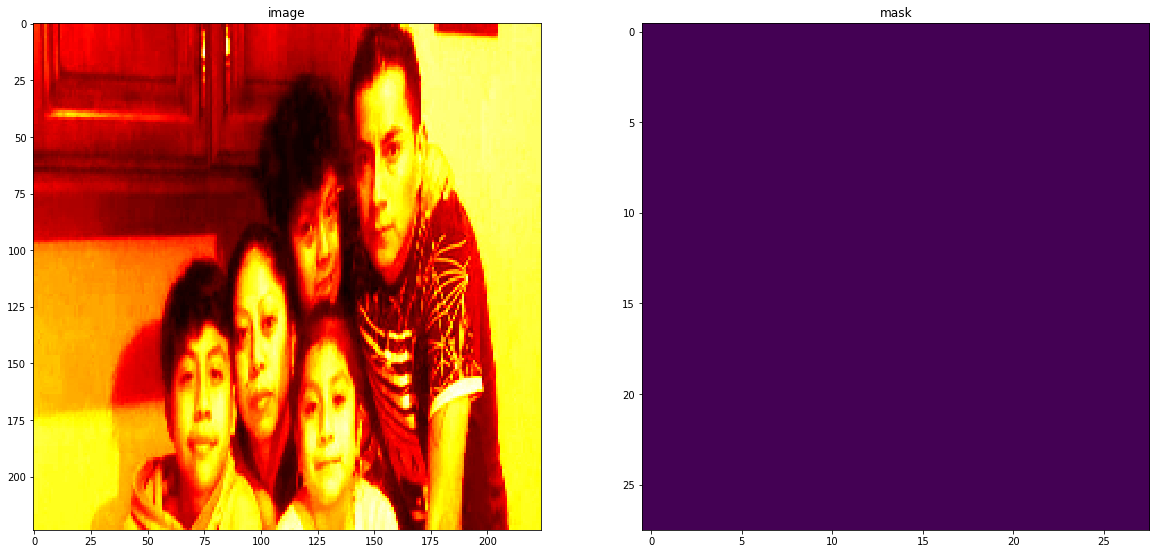

In [0]:
plot_sample(X_train,masks)